Name: Madhav Jha

Roll: E3-48

Branch: CSE(AIML)

# DL lab: 7

## AIM: Write a program to implement autoencoder, Lenet5, VGG16 and alexnet on MNIST dataset. Compare the results in terms of training time and accuracy (both training and testing).

## 1. Auto encoder

In [1]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import keras

In [2]:
encoding_dim = 64
input_img = Input(shape=(784,))

# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)

# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded) 

In [3]:
# This model shows encoded images
encoder = Model(input_img, encoded)

# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))

# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)
(10000, 784)


In [5]:
%%time

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,epochs=15, batch_size=256, validation_data=(x_test, x_test))
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img) 

Epoch 1/15
235/235 [==============================] - 7s 9ms/step - loss: 0.2459 - val_loss: 0.1621
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1438 - val_loss: 0.1274
Epoch 3/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1188 - val_loss: 0.1092
Epoch 4/15
235/235 [==============================] - 2s 8ms/step - loss: 0.1046 - val_loss: 0.0982
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0955 - val_loss: 0.0908
Epoch 6/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0891 - val_loss: 0.0855
Epoch 7/15
235/235 [==============================] - 2s 9ms/step - loss: 0.0846 - val_loss: 0.0819
Epoch 8/15
235/235 [==============================] - 2s 9ms/step - loss: 0.0814 - val_loss: 0.0793
Epoch 9/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0793 - val_loss: 0.0776
Epoch 10/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0778 - val_loss: 0.0765

In [6]:
import matplotlib.pyplot as plt

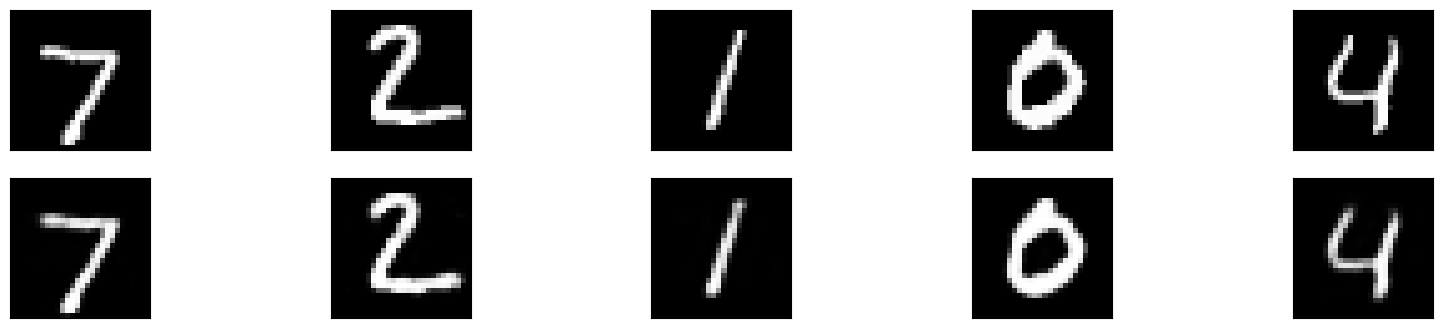

In [7]:
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Lenet5

In [ ]:
import keras.layers as layers
!pip3 install visualkeras
import visualkeras
import time

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train shape', x_train.shape, 'X_test shape', x_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print('X_train shape', x_train.shape, 'X_test shape', x_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [11]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [12]:
startTime = time.time()
model.fit(x_train,y_train,epochs=10)
endTime = time.time()

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2290 - accuracy: 0.9296
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0736 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0403 - accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.

In [13]:
models = {}

In [14]:
def addToDict(model_name, model):
  models[model_name] = {}

  print("on traning data: ")
  train = model.evaluate(x_train,y_train)
  models[model_name]["train"] = round(train[1]*100,4)

  print("on testing data: ")
  test = model.evaluate(x_test,y_test)
  models[model_name]["test"] = round(test[1]*100, 4)

  models[model_name]["time"] = (endTime - startTime)

  print("data: ")
  print(models[model_name])

In [15]:
addToDict("Lenet-5",model)

on traning data: 
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9973
on testing data: 
313/313 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9908
data: 
{'train': 99.7333, 'test': 99.08, 'time': 82.7493040561676}


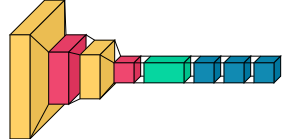

In [16]:
visualkeras.layered_view(model)

## 3. VGG16

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [18]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [26]:
startTime = time.time()
model.fit(x_train,y_train,epochs=100)
endTime = time.time()

Epoch 1/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0256 - accuracy: 0.9943
Epoch 2/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0273 - accuracy: 0.9943
Epoch 3/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0259 - accuracy: 0.9942
Epoch 4/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0276 - accuracy: 0.9947
Epoch 5/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0261 - accuracy: 0.9948
Epoch 6/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0244 - accuracy: 0.9955
Epoch 7/100
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0220 - accuracy: 0.9956
Epoch 8/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0195 - accuracy: 0.9960
Epoch 9/100
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0195 - accuracy: 0.9962
Epoch 10/100
1875/1875 [==============================] - 15s 8m

on traning data: 
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0261 - accuracy: 0.9941
on testing data: 
313/313 [==============================] - 1s 5ms/step - loss: 0.1247 - accuracy: 0.9870
data: 
{'train': 99.4067, 'test': 98.7, 'time': 1582.2733597755432}


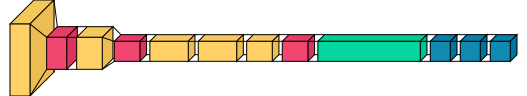

In [27]:
addToDict("VGG16",model)
visualkeras.layered_view(model)

## 4. Alex net

In [21]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), activation='relu',input_shape=(28,28,1)))

model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(3,3),strides=(2,2)))

model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=384, kernel_size=(3, 3),padding="same", activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3),padding="same", activation='relu'))

model.add(MaxPool2D(pool_size=(3,3),strides=(2,2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [22]:
startTime = time.time()
model.fit(x_train,y_train,epochs=10)
endTime = time.time()

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2692 - accuracy: 0.9103
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0782 - accuracy: 0.9814
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0595 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0480 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0430 - accuracy: 0.9900
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0359 - accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0367 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0348 - accuracy: 0.9922
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0332 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

on traning data: 
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9951
on testing data: 
313/313 [==============================] - 2s 6ms/step - loss: 0.0456 - accuracy: 0.9905
data: 
{'train': 99.5133, 'test': 99.05, 'time': 153.8892056941986}


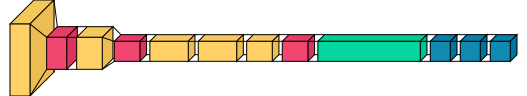

In [23]:
addToDict("Alex-net",model)
visualkeras.layered_view(model)

### comparison:

In [24]:
import pandas as pd

In [28]:
df = pd.DataFrame(models)
df

,Lenet-5,VGG16,Alex-net
train,99.733300,99.40670,99.513300
test,99.080000,98.70000,99.050000
time,82.749304,1582.27336,153.889206
